# MNIST with tf.contrib.learn

This notebook walks you through the basics of classifying digits using tf.contrib.learn

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [75]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


There are 55k examples in train, and 10k in eval. You may wish to limit the size to experiment faster. 

In [76]:
#max_examples = 10000
#data = data[:max_examples]
#labels = labels[:max_examples]

## Display some digits

In [77]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

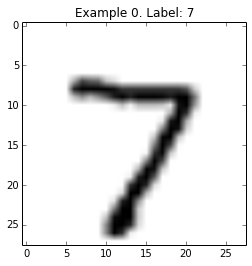

In [78]:
display(0)

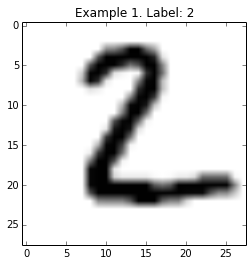

In [79]:
display(1)

These digits are clearly drawn. Here's one that's not.

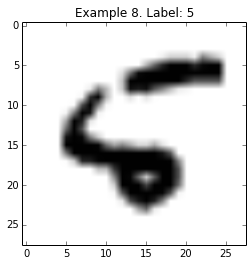

In [80]:
display(8)

Now let's take a look at how many features we have.

In [81]:
print len(data[0])

784


## Fit a Linear Classifier

Our goal here is to get about 90% accuracy with this simple classifier. For more details on how these work, see https://www.tensorflow.org/versions/r0.10/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners

In [82]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

Estimator(params={'enable_centered_bias': True, 'weight_column_name': None, 'optimizer': <tensorflow.python.training.ftrl.FtrlOptimizer object at 0x118d305d0>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 10, 'joint_weights': False, 'gradient_clip_norm': None, 'num_ps_replicas': 0})

## Evaluate accuracy

In [83]:
classifier.evaluate(test_data, test_labels)["accuracy"]

0.92189997

## Classify a few examples

We can make predictions on individual images using the predict method

Predicted 7, Label: 7


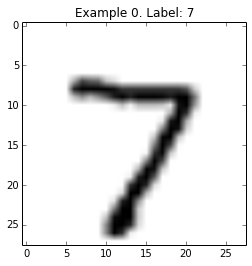

In [84]:
# here's one it gets right
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[0]), test_labels[0]))
display(0)

Predicted 6, Label: 5


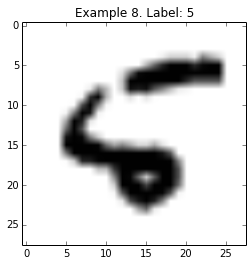

In [85]:
# and one it gets wrong
print ("Predicted %d, Label: %d" % (classifier.predict(test_data[8]), test_labels[8]))
display(8)

## Visualize learned weights


Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT <a href="https://www.tensorflow.org/tutorials/mnist/beginners/index.html#mnist-for-ml-beginners">tutorial</a>. 

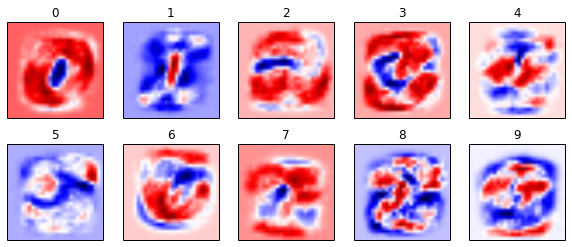

In [86]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(()) # ticks be gone
    a.set_yticks(())
plt.show()

## Switch the estimator to a DNN

In [87]:
# Build 2 layer DNN with 128, 32 units respectively.
# Play with these parameters to see if you can do better
classifier = learn.DNNClassifier(feature_columns=feature_columns,
                                 hidden_units=[128, 32],
                                 n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=2000)

Estimator(params={'enable_centered_bias': True, 'activation_fn': <function relu at 0x1138e2f50>, 'weight_column_name': None, 'hidden_units': [128, 32], 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'n_classes': 10, 'optimizer': 'Adagrad', 'dropout': None, 'gradient_clip_norm': None, 'num_ps_replicas': 0})

## Has our accuracy improved?

In [88]:
classifier.evaluate(test_data, test_labels)["accuracy"]

0.9684

# Next steps

* Visualizing MNIST: http://colah.github.io/posts/2014-10-Visualizing-MNIST/
* More about linear classifiers: http://cs231n.github.io/linear-classify/